# Obtaining basic statistics for textual lengths

In [2]:
import pandas as pd
import yfinance as yf
import nltk 
import spacy
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer


import nltk
nltk.download('vader_lexicon')



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/yadasa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/yadasa/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/yadasa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Project Planning - EDA & Stats

In [5]:
df = pd.read_csv("/home/yadasa/Desktop/Finance-Data-Analysis/data/raw_analyst_ratings.csv",)

In [5]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


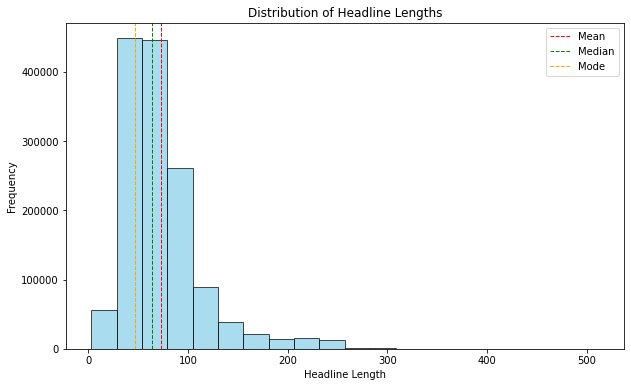

In [8]:
# Calculate the length of each headline and create a new column
df['headline_length'] = df['headline'].apply(len)

# Basic statistics for headline length
headline_stats = df['headline_length'].describe()

# Print the statistics
print(headline_stats)

# Plotting
plt.figure(figsize=(10, 6))

# Histogram of headline lengths
plt.hist(df['headline_length'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.title('Distribution of Headline Lengths')

# Add vertical lines for mean, median, and mode
plt.axvline(df['headline_length'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['headline_length'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')

mode_val = df['headline_length'].mode()[0]  # Mode could be multiple values, so taking the first one
plt.axvline(mode_val, color='orange', linestyle='dashed', linewidth=1, label='Mode')

plt.legend()

# Show plot
plt.show()


In [10]:
df.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'stock',
       'headline_length'],
      dtype='object')

In [9]:
# Check if the 'date' column exists in the DataFrame
if 'date' in df.columns:
    # Convert the 'date' column to datetime format with the correct format
    df['date'] = pd.to_datetime(df['date'], errors='coerce', format='%Y-%m-%d %H:%M:%S')

    # Extract relevant date components for analysis
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['weekday'] = df['date'].dt.weekday  

    # Analyze trends over time, such as news frequency by year, month, day, and weekday
    news_frequency_by_year = df['year'].value_counts().sort_index()
    news_frequency_by_month = df.groupby('month').size()
    news_frequency_by_day = df.groupby('day').size()
    news_frequency_by_weekday = df.groupby('weekday').size()

    # Plotting news frequency trends over time
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    news_frequency_by_year.plot(kind='bar', color='skyblue')
    plt.title('News Frequency by Year')
    plt.xlabel('Year')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 2)
    news_frequency_by_month.plot(kind='bar', color='salmon')
    plt.title('News Frequency by Month')
    plt.xlabel('Month')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 3)
    news_frequency_by_day.plot(kind='line', color='green')
    plt.title('News Frequency by Day')
    plt.xlabel('Day')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 4)
    news_frequency_by_weekday.plot(kind='bar', color='orange')
    plt.title('News Frequency by Weekday')
    plt.xlabel('Weekday')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
else:
    print("Error: 'date' column not found in the DataFrame.")


Error: 'date' column not found in the DataFrame.


In [15]:
df.describe()

,Unnamed: 0,date,year,month,day,weekday
count,1.407328e+06,1351341,1.351341e+06,1.351341e+06,1.351341e+06,1.351341e+06
mean,7.072454e+05,2015-07-06 06:39:44.879020288,2.015021e+03,6.413978e+00,1.555752e+01,1.998925e+00
min,0.000000e+00,2009-02-14 00:00:00,2.009000e+03,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.538128e+05,2012-12-04 00:00:00,2.012000e+03,3.000000e+00,8.000000e+00,1.000000e+00
50%,7.072395e+05,2015-07-21 00:00:00,2.015000e+03,6.000000e+00,1.500000e+01,2.000000e+00
75%,1.060710e+06,2018-03-09 00:00:00,2.018000e+03,1.000000e+01,2.300000e+01,3.000000e+00
max,1.413848e+06,2020-06-03 00:00:00,2.020000e+03,1.200000e+01,3.100000e+01,6.000000e+00
std,4.081009e+05,NaN,3.024726e+00,3.469710e+00,8.809733e+00,1.427424e+00


In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get the sentiment score for each headline
def get_sentiment_score(text):
    sentiment = sia.polarity_scores(text)  # Get sentiment scores
    return sentiment

# Apply the function to each headline and store the results in a new column
df['sentiment'] = df['headline'].apply(get_sentiment_score)

# Define a function to classify the sentiment based on the compound score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the compound score and store the results in a new column
df['sentiment_class'] = df['sentiment'].apply(lambda x: classify_sentiment(x['compound']))

# Count the number of headlines per sentiment class
sentiment_counts = df['sentiment_class'].value_counts()

# Print the sentiment counts in a more descriptive format
print("Sentiment Analysis Results:")
print("-------------------------")
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {count} headlines")


Sentiment Analysis Results:
-------------------------
Neutral: 741194 headlines
Positive: 441858 headlines
Negative: 224276 headlines


In [6]:
# Load the English tokenizer, tagger, parser, and NER
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 1500000  # Increase max_length to handle longer texts

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Set chunk size
chunk_size = 100000  # Adjust as needed

# Function to process text in chunks
def process_text_chunks(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Filter out stop words and punctuation
    filtered_tokens = [word for word in tokens if word.isalnum() and word.lower() not in stop_words]

    # Perform part-of-speech tagging to extract nouns and proper nouns
    pos_tags = pos_tag(filtered_tokens)
    nouns = [word for word, pos in pos_tags if pos.startswith('NN')]

    # Use spaCy for named entity recognition (NER)
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    # Filter entities to extract only significant ones
    significant_entities = [entity[0] for entity in entities if entity[1] in ['ORG', 'PERSON', 'GPE', 'EVENT']]

    # Combine both noun phrases and significant named entities
    keywords = nouns + significant_entities

    return keywords

# Concatenate all headlines into a single string
all_headlines = ' '.join(df['headline'])

# Process the text in chunks
chunks = [all_headlines[i:i+chunk_size] for i in range(0, len(all_headlines), chunk_size)]

# Initialize a list to store keywords from all chunks
all_keywords = []

# Process each chunk separately
for chunk in chunks:
    keywords = process_text_chunks(chunk)
    all_keywords.extend(keywords)

# Calculate the frequency distribution of keywords
fdist = FreqDist(all_keywords)

# Get the most common keywords
common_keywords = fdist.most_common(10)

# Print the most common keywords
print("Most common keywords or phrases:")
for keyword, frequency in common_keywords:
    print(f"{keyword}: {frequency}")


Most common keywords or phrases:
Stocks: 157529
EPS: 136718
Est: 120858
Reports: 106667
vs: 104958
Benzinga: 92032
Shares: 91631
Earnings: 84910
Market: 83721
Top: 75682


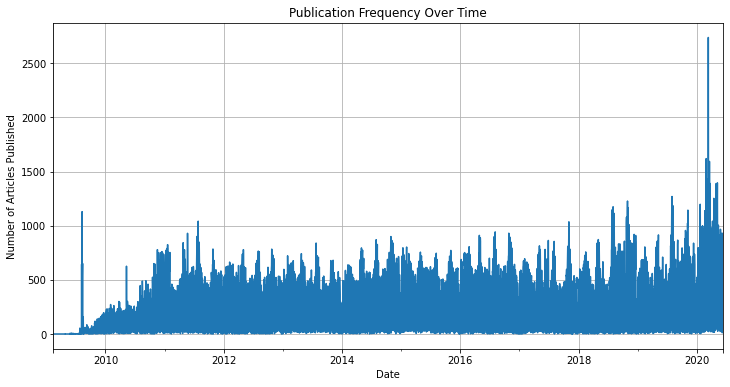

In [7]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='ISO8601')

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Resample the data to get the count of articles per day
article_count_per_day = df.resample('D').size()

# Plot the publication frequency over time
plt.figure(figsize=(12, 6))
article_count_per_day.plot()
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles Published')
plt.grid(True)
plt.show()


 # Analysis of publishing times might reveal if there’s a specific time when most news is released, which could be crucial for traders and automated trading systems

In [5]:
df = df = pd.read_csv("../data/raw_analyst_ratings.csv")

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


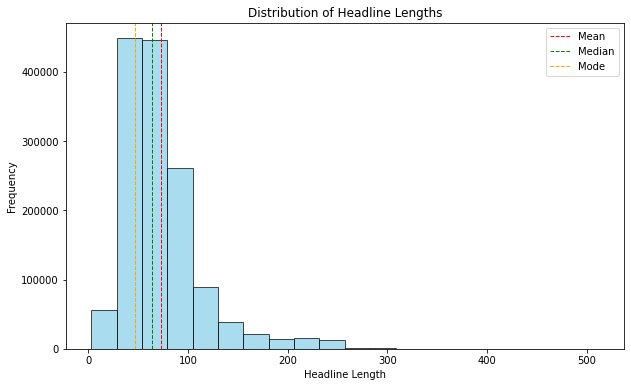

In [12]:
# Calculate the length of each headline and create a new column
df['headline_length'] = df['headline'].apply(len)

# Basic statistics for headline length
headline_stats = df['headline_length'].describe()

# Print the statistics
print(headline_stats)

# Plotting
plt.figure(figsize=(10, 6))

# Histogram of headline lengths
plt.hist(df['headline_length'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.title('Distribution of Headline Lengths')

# Add vertical lines for mean, median, and mode
plt.axvline(df['headline_length'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['headline_length'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')

mode_val = df['headline_length'].mode()[0]  # Mode could be multiple values, so taking the first one
plt.axvline(mode_val, color='orange', linestyle='dashed', linewidth=1, label='Mode')

plt.legend()

# Show plot
plt.show()


In [21]:
df.head(10)

,Unnamed: 0,headline,url,publisher,stock,headline_length,domain
date,,,,,,,
2020-06-05 10:30:54-04:00,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,39,NaN
2020-06-03 10:45:20-04:00,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,42,NaN
2020-05-26 04:30:07-04:00,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,29,NaN
2020-05-22 12:45:06-04:00,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,44,NaN
2020-05-22 11:38:59-04:00,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,87,NaN
2020-05-22 11:23:25-04:00,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,A,71,benzinga.com
2020-05-22 09:36:20-04:00,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,A,73,benzinga.com
2020-05-22 09:07:04-04:00,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,A,120,NaN
2020-05-22 08:37:59-04:00,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,A,84,benzinga.com


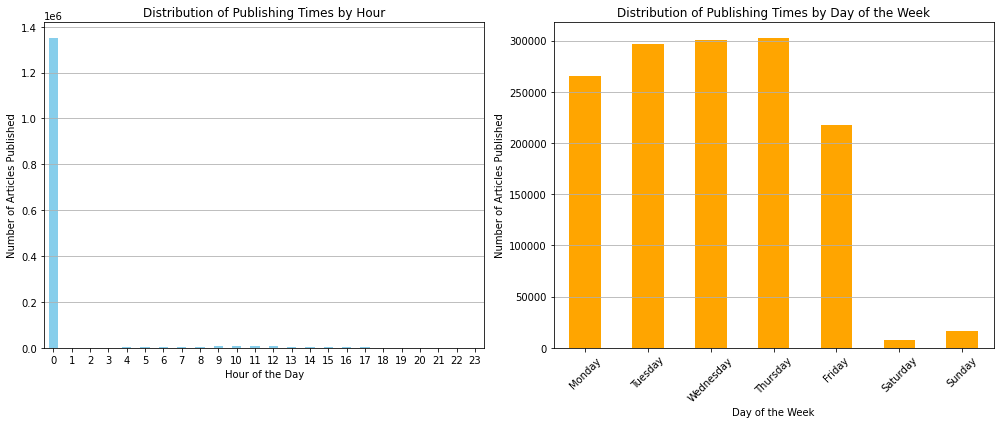

Statistical Analysis:
Hourly Mean: 58638.67, Hourly Standard Deviation: 275368.94
Daily Mean: 201046.86, Daily Standard Deviation: 132417.21

Recommendations:
The best hour for publishing articles is around 0:00.
The best day for publishing articles is Thursday.


In [27]:

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'],format='ISO8601')

# Extract the day of the week and hour of the day from the 'date' column
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour

# Count the number of articles published during each hour and day of the week
article_count_by_hour = df.groupby('hour').size()
article_count_by_day = df.groupby('day_of_week').size()

# Plot the distribution of publishing times by hour
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
article_count_by_hour.plot(kind='bar', color='skyblue')
plt.title('Distribution of Publishing Times by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles Published')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Plot the distribution of publishing times by day of the week
plt.subplot(1, 2, 2)
article_count_by_day[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot(kind='bar', color='orange')
plt.title('Distribution of Publishing Times by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles Published')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Statistical analysis
hourly_mean = article_count_by_hour.mean()
hourly_std = article_count_by_hour.std()

daily_mean = article_count_by_day.mean()
daily_std = article_count_by_day.std()

# Recommendations
optimal_hour = article_count_by_hour.idxmax()
optimal_day = article_count_by_day.idxmax()

print("Statistical Analysis:")
print(f"Hourly Mean: {hourly_mean:.2f}, Hourly Standard Deviation: {hourly_std:.2f}")
print(f"Daily Mean: {daily_mean:.2f}, Daily Standard Deviation: {daily_std:.2f}")

print("\nRecommendations:")
print(f"The best hour for publishing articles is around {optimal_hour}:00.")
print(f"The best day for publishing articles is {optimal_day}.")



# Which publishers contribute most to the news feed? Is there a difference in the type of news they report?

# To answer the above two question, we use 
# 1)findind number of article publishe by each publisher
# 2)Number of stop words in each publishing

In [29]:
# Count the number of articles published by each publisher
publisher_counts = df['publisher'].value_counts()

# Sort publishers by the number of articles published (in ascending order)
sorted_publishers = publisher_counts.sort_values().index

# Filter out stop words
stop_words = set(stopwords.words('english'))

# Tokenize and process the headlines to identify common keywords
keywords_by_publisher = {}
for publisher in sorted_publishers:
    publisher_data = df[df['publisher'] == publisher]
    all_headlines = ' '.join(publisher_data['headline'])
    tokens = word_tokenize(all_headlines)
    filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    fdist = FreqDist(filtered_tokens)
    keywords_by_publisher[publisher] = fdist.most_common(10)  # Get top 10 keywords for each publisher

# Print the number of articles published by each publisher
print("Number of articles published by each publisher (in ascending order):")
print(publisher_counts)
print("\n")

# Print the top keywords associated with each publisher
print("Top keywords associated with each publisher:")
for publisher in sorted_publishers:
    print(f"Publisher: {publisher}")
    keywords = keywords_by_publisher.get(publisher, [])
    for keyword, frequency in keywords:
        print(f"{keyword}: {frequency}")
    print("\n")


Number of articles published by each publisher (in ascending order):
publisher
Paul Quintaro                 228373
Lisa Levin                    186979
Benzinga Newsdesk             150484
Charles Gross                  96732
Monica Gerson                  82380
                               ...  
David Wenger                       1
Holly Huber - CrowdStreet          1
Ryan Smith                         1
vic@forextraininggroup.com         1
official@stockmetrix.net           1
Name: count, Length: 1034, dtype: int64


Top keywords associated with each publisher:
Publisher: Joe Donato
investors: 1
bid: 1
adieu: 1
baidu: 1
jpmorgan: 1
initiates: 1
underweight: 1


Publisher: Holly Huber - CrowdStreet
lights: 1
camera: 1
production: 1
hollywood: 1
real: 1
estate: 1
developing: 1
means: 1
investors: 1


Publisher: David Wenger
white: 1
paper: 1
case: 1
investing: 1
us: 1
cannabis: 1
industry: 1


Publisher: Monetarex
healthcare: 1
shocker: 1


Publisher: Suresh Gupta
restaurant: 1
sect

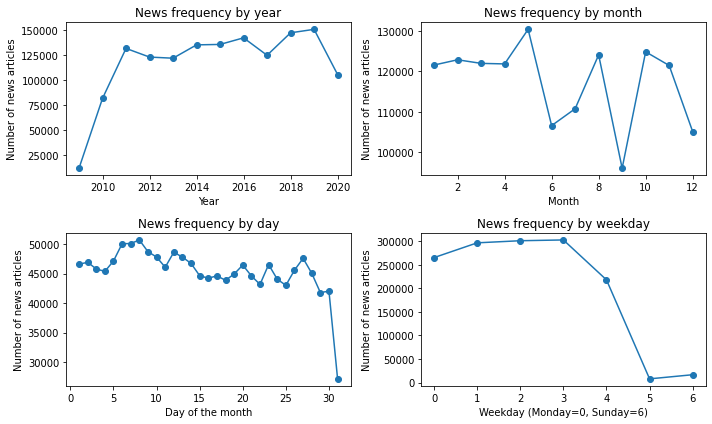

In [31]:

# with a column named 'date' containing the publication dates.

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'],format='ISO8601')

# Extract relevant date components for analysis
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday  # Monday is 0, Sunday is 6

# Analyze trends over time, such as news frequency by year, month, day, and weekday
news_frequency_by_year = df['year'].value_counts().sort_index()
news_frequency_by_month = df.groupby('month')['headline'].count()
news_frequency_by_day = df.groupby('day')['headline'].count()
news_frequency_by_weekday = df.groupby('weekday')['headline'].count()

# Plotting for time series analysis
plt.figure(figsize=(10, 6))

# News frequency by year
plt.subplot(2, 2, 1)
plt.plot(news_frequency_by_year.index, news_frequency_by_year.values, marker='o')
plt.title("News frequency by year")
plt.xlabel("Year")
plt.ylabel("Number of news articles")

# News frequency by month
plt.subplot(2, 2, 2)
plt.plot(news_frequency_by_month.index, news_frequency_by_month.values, marker='o')
plt.title("News frequency by month")
plt.xlabel("Month")
plt.ylabel("Number of news articles")

# News frequency by day
plt.subplot(2, 2, 3)
plt.plot(news_frequency_by_day.index, news_frequency_by_day.values, marker='o')
plt.title("News frequency by day")
plt.xlabel("Day of the month")
plt.ylabel("Number of news articles")

# News frequency by weekday
plt.subplot(2, 2, 4)
plt.plot(news_frequency_by_weekday.index, news_frequency_by_weekday.values, marker='o')
plt.title("News frequency by weekday")
plt.xlabel("Weekday (Monday=0, Sunday=6)")
plt.ylabel("Number of news articles")

plt.tight_layout()
plt.show()


In [40]:

# with a column named 'headline' containing the headlines.

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get the sentiment score for each headline
def get_sentiment_score(text):
    sentiment = sia.polarity_scores(text)
    return sentiment

# Apply the function to each headline and store the results in a new column
df['sentiment'] = df['headline'].apply(get_sentiment_score)

# Define a function to classify the sentiment based on the compound score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the compound score and store the results in a new column
df['sentiment_class'] = df['sentiment'].apply(lambda x: classify_sentiment(x['compound']))

# Count the number of headlines per sentiment class
sentiment_counts = df['sentiment_class'].value_counts()

# Print the sentiment counts
print(sentiment_counts)


sentiment_class
Neutral     741194
Positive    441858
Negative    224276
Name: count, dtype: int64


In [7]:

# Load the English tokenizer, tagger, parser, NER, and stop words
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english'))

# Concatenate all headlines into a single string
all_headlines = ' '.join(df['headline'])

# Define a function to chunk the text
def chunk_text(text, chunk_size):
    chunks = []
    start = 0
    while start < len(text):
        chunks.append(text[start:start+chunk_size])
        start += chunk_size
    return chunks

# Chunk the text into smaller parts
chunk_size = 100000  # Set the chunk size
text_chunks = chunk_text(all_headlines, chunk_size)

# Process each chunk
keywords = []
for chunk in text_chunks:
    # Tokenize the text
    tokens = word_tokenize(chunk)

    # Filter out stop words and punctuation
    filtered_tokens = [word for word in tokens if word.isalnum() and word.lower() not in stop_words]

    # Perform part-of-speech tagging to extract nouns and proper nouns
    pos_tags = nltk.pos_tag(filtered_tokens)
    nouns = [word for word, pos in pos_tags if pos.startswith('NN')]

    # Use spaCy for named entity recognition (NER)
    doc = nlp(chunk)
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    # Filter entities to extract only significant ones
    significant_entities = [entity[0] for entity in entities if entity[1] in ['ORG', 'PERSON', 'GPE', 'EVENT']]

    # Combine both noun phrases and significant named entities
    keywords.extend(nouns + significant_entities)

# Calculate the frequency distribution of keywords
fdist = FreqDist(keywords)

# Get the most common keywords
common_keywords = fdist.most_common(10)

# Print the most common keywords
print("Most common keywords or phrases:")
for keyword, frequency in common_keywords:
    print(f"{keyword}: {frequency}")


In [ ]:
# with a column named 'date' containing the publication dates.

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'],format='ISO8601')

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Resample the data to get the count of articles per day
article_count_per_day = df.resample('D').size()

# Plot the publication frequency over time
plt.figure(figsize=(12, 6))
article_count_per_day.plot()
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles Published')
plt.grid(True)
plt.show()


In [ ]:
# with a column named 'date' containing the publication dates.

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'],format='ISO8601')

# Extract the hour of the day from the 'date' column
df['hour'] = df['date'].dt.hour

# Count the number of articles published during each hour
article_count_by_hour = df.groupby('hour').size()

# Plot the distribution of publishing times
plt.figure(figsize=(10, 6))
article_count_by_hour.plot(kind='bar')
plt.title('Distribution of Publishing Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles Published')
plt.xticks(range(24), rotation=0)
plt.grid(axis='y')
plt.show()


# What if the publisher is an Orginization which contributes most to news?
# if eamil is used as publisher name we can extract unique domains

In [ ]:
# Extract domain from email addresses
df['domain'] = df['publisher'].str.extract(r'@(.*)')

# Count the number of articles published by each domain
domain_counts = df['domain'].value_counts()

# Plot the distribution of articles published by domain
plt.figure(figsize=(10, 6))
domain_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Domains by Number of Articles Published')
plt.xlabel('Domain')
plt.ylabel('Number of Articles Published')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Print the unique domains and their corresponding publication counts
print("Unique domains and their publication counts:")
print(domain_counts)

# Find the domain with the highest number of articles published
most_contributor_domain = domain_counts.idxmax()
articles_published = domain_counts.max()

# Print the most contributing domain
print(f"\nThe most contributing domain is '{most_contributor_domain}' with {articles_published} articles published.")


Unique domains and their publication counts:
domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64
The most contributing domain is 'benzinga.com' with 7937 articles published.


# The most contributing domain is 'benzinga.com' with 7937 articles published.